In [19]:
import pandas as pd
import numpy as np

In [20]:
processed = 'processed'
submissions = 'submissions'
df_train = pd.read_csv(f'{processed}/train.csv')
df_test =  pd.read_csv(f'{processed}/test.csv')

In [21]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

cl = GradientBoostingClassifier()
field_name = 'Survived'
feature_names = ['SibSp', 'Sex_male', 'Sex_female'] + [col for col in df_test.columns if 'Age_' in col]
kfold = KFold(random_state=42, n_splits=2)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(cl, df_train[feature_names], df_train[field_name], cv=kfold)
np.mean(accuracies)

0.8103189398901598

In [22]:
cl.fit(df_train[feature_names], df_train[field_name])
y_test = cl.predict(df_test[feature_names])
df_submit = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_test})
df_submit['Survived'] = df_submit['Survived'].astype(int)
df_submit.to_csv(f'{submissions}/submission013.csv', index=False)

In [23]:
# LB score: 0.78468 (vs 0.76555 with no Age_ stuff)
!head submissions/submission013.csv

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,1
898,1
899,0
900,1


In [24]:
!open submissions

In [37]:
df_features = pd.DataFrame({'name': feature_names, 'importance': cl.feature_importances_})
df_features.sort_values('importance', ascending=False, inplace=True)

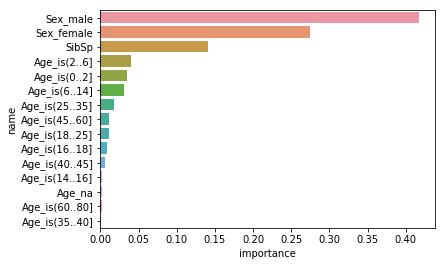

In [38]:
%matplotlib inline
import seaborn as sns
sns.barplot(x="importance", y="name", data=df_features)